In [80]:
import numpy as np #Lets handle our imports now for section A
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from viresclient import SwarmRequest
alt=110
from numpy.typing import NDArray


In [81]:
def sinc_interpolation(x: NDArray, s: NDArray, u: NDArray) -> NDArray:
    """Whittaker–Shannon or sinc or bandlimited geodeticolation.
    Args:
        x (NDArray): signal to be geodeticolated, can be 1D or 2D
        s (NDArray): time points of x (*s* for *samples*)
        u (NDArray): time points of y (*u* for *upsampled*)
    Returns:
        NDArray: geodeticolated signal at time points *u*
    Reference:
        This code is based on https://gist.github.com/endolith/1297227
        and the comments therein.
    TODO:
        * implement FFT based geodeticolation for speed up
    """
    sinc_ = np.sinc((u - s[:, None]) / (s[1] - s[0]))

    return np.dot(x, sinc_)

In [82]:
time_array=(datetime(2020,3,19,3), datetime(2020,3,19,5))

In [83]:
#From documentation link
def requester(sc_collection, measurement, residual, sampling_step=None, **kwargs):
    try:
        request = SwarmRequest()
        request.set_collection(sc_collection)
        if residual == True:
            request.set_products(
                measurements=measurement,
                models=["CHAOS"],
                residuals=True,
                sampling_step=sampling_step,
            )
        else:
            request.set_products(
                measurements=measurement,
                models=["CHAOS"],
                sampling_step=sampling_step,
            )
        data = request.get_between(time_array[0], time_array[1], **kwargs) #sets to get data between the first and last value in the time tuple
        df = data.as_dataframe()
    except:
        df = []
    return df

In [84]:

dsEtest = requester(
"SW_EXPT_EFIB_TCT02", # 16Hz E ( Electric field)
["Ehx"], #Magnetic field in NEC coordinates
True,
asynchronous=False,
show_progress=False)
dsBtest = requester(
 'SW_OPER_MAGB_LR_1B',
  ["B_NEC"], #Magnetic field in NEC coordinates
 True,
 asynchronous=False,
 show_progress=False)


In [85]:
from scipy.interpolate import CubicSpline
print(dsEtest.index.to_numpy(), dsEtest['Latitude'].to_numpy())
cs = CubicSpline(dsEtest.index.to_numpy(), dsEtest['Latitude'].to_numpy())
latitudes_1sps = cs(dsBtest.index.to_numpy())



['2020-03-19T03:00:00.225250006' '2020-03-19T03:00:00.725250006'
 '2020-03-19T03:00:01.225250006' ... '2020-03-19T04:59:58.725250006'
 '2020-03-19T04:59:59.225250006' '2020-03-19T04:59:59.725250006'] [85.860085  85.88669   85.9132    ... -2.7923136 -2.8239784 -2.8556442]


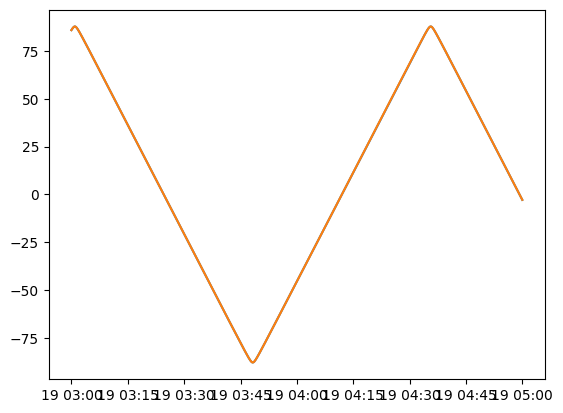

In [86]:
plt.plot(dsBtest.index.to_numpy(), latitudes_1sps)
plt.plot(dsBtest.index.to_numpy(), dsBtest['Latitude'].to_numpy() )



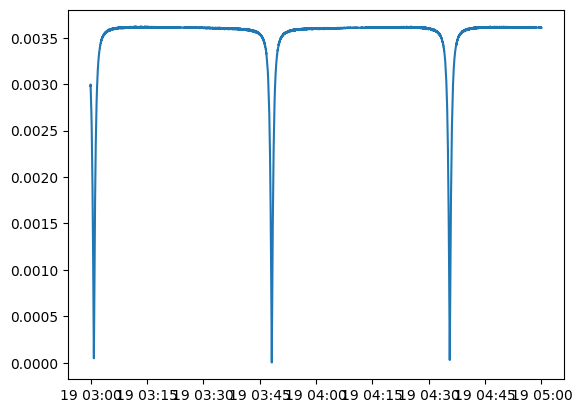

In [87]:
plt.plot(dsBtest.index.to_numpy() , np.abs(latitudes_1sps - dsBtest['Latitude'].to_numpy())) #Theres some gunk at the poles but otherwise its stable around 0.06 deg lag

In [88]:
time_array=(datetime(2022,12,19,13), datetime(2022,12,19,15))
dsEtest = requester(
    "SW_EXPT_EFIB_TCT02", # 16Hz E ( Electric field)
    ["Ehx"], #Magnetic field in NEC coordinates
    True,
    asynchronous=False,
    show_progress=False) 
dsBtest = requester(
 'SW_OPER_MAGB_LR_1B', #Mag B, low resolution, 1Hz B (Magnetic
 ["B_NEC"], #Magnetic field in NEC coordinates
 True,
 asynchronous=False,
 show_progress=False)


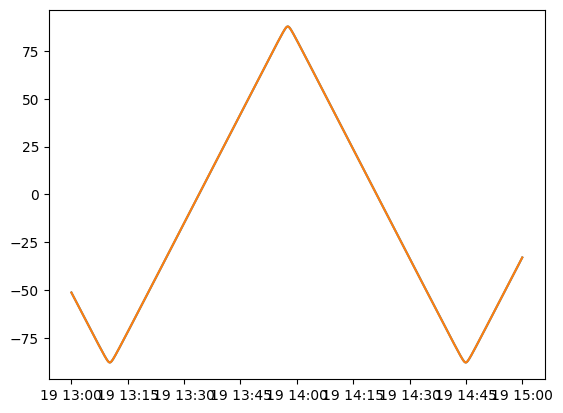

In [89]:
plt.plot(dsEtest.index, dsEtest['Latitude'].to_numpy())
plt.plot(dsBtest.index, dsBtest['Latitude'].to_numpy()) 

Now lets try with cubic spline 

In [90]:

cs = CubicSpline(dsEtest.index.to_numpy(), dsEtest['Latitude'].to_numpy())
latitudes_1sps = cs(dsBtest.index.to_numpy())

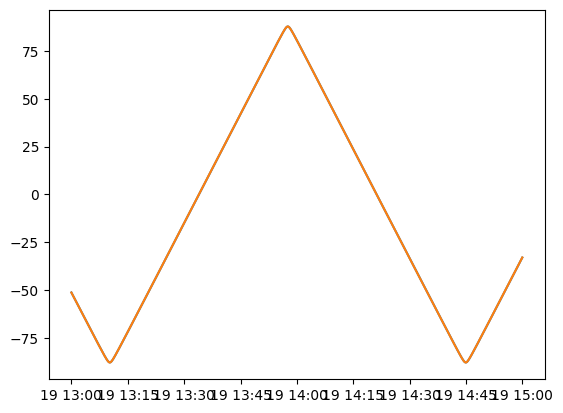

In [91]:
plt.plot(dsBtest.index.to_numpy(), latitudes_1sps)
plt.plot(dsBtest.index.to_numpy(), dsBtest['Latitude'].to_numpy() )


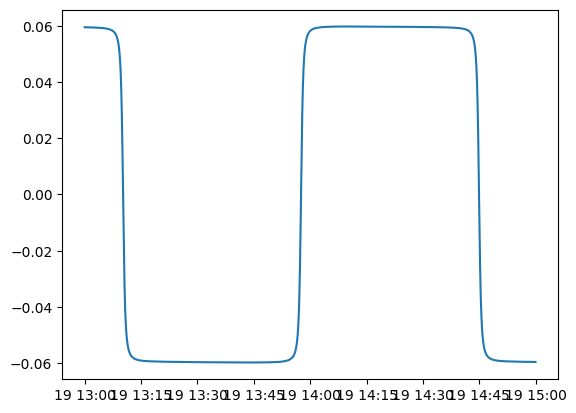

In [94]:
plt.plot(dsBtest.index.to_numpy() , (latitudes_1sps - dsBtest['Latitude'].to_numpy())) #Theres some gunk at the poles but otherwise its stable around 0.06 deg lag

(0.0, 0.1)

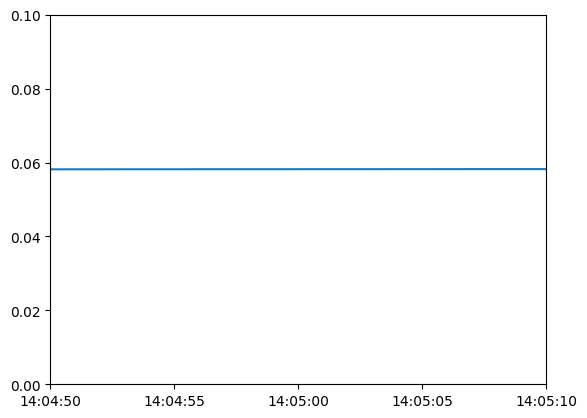

In [95]:
plt.plot(dsBtest.index , np.abs(Eonesps-dsBtest['Latitude'].to_numpy())) #the ends have errors so lets take the middle 20 seconds
plt.xlim(datetime(2022,12,19,14,4,50), datetime(2022,12,19,14,5,10) )
plt.ylim(0,0.1)